## Univariate Non Graphical Analysis

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Dropping Null and Duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
# Changing the Datatype
df["id"] = df["id"].astype("str")
df["host_id"] =df["host_id"].astype("str")
df["latitude"] =df["latitude"].astype("str")
df["longitude"] =df["longitude"].astype("str")

In [9]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Categorical
working with Categorical column

In [12]:
# In a particular city how many hotels are available
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [14]:
# Share of hotels in each city
df["neighbourhood_group"].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [15]:
df["room_type"].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [16]:
df["room_type"].value_counts(normalize=True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [17]:
df["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [22]:
df_new = df["neighbourhood"].value_counts().reset_index().rename(columns={"count":"number_of_hotels"})

In [23]:
df_new # no of hotels in each neighbourhood

,neighbourhood,number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [25]:
# Cities having number of hotels > 1000
df_new[df_new["number_of_hotels"] > 1000]

,neighbourhood,number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


### Numerical

In [26]:
# Min to Max price gets divides into 5 intervals and returns counts in those 5 intervals
df["price"].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [27]:
# Defining bins
bins = (0,50,100,200,500,2000,10000)

In [28]:
df["price"].value_counts(bins=bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [29]:
# Average price of a hotel in New York City
df["price"].mean()

142.33252621004095

In [30]:
df["price"].std() # Variation in Data

196.99475591833985

In [31]:
df["price"].skew()

23.673594295123014

In [32]:
# Describes the height of the Graph
df["price"].kurtosis()

953.4807356344944

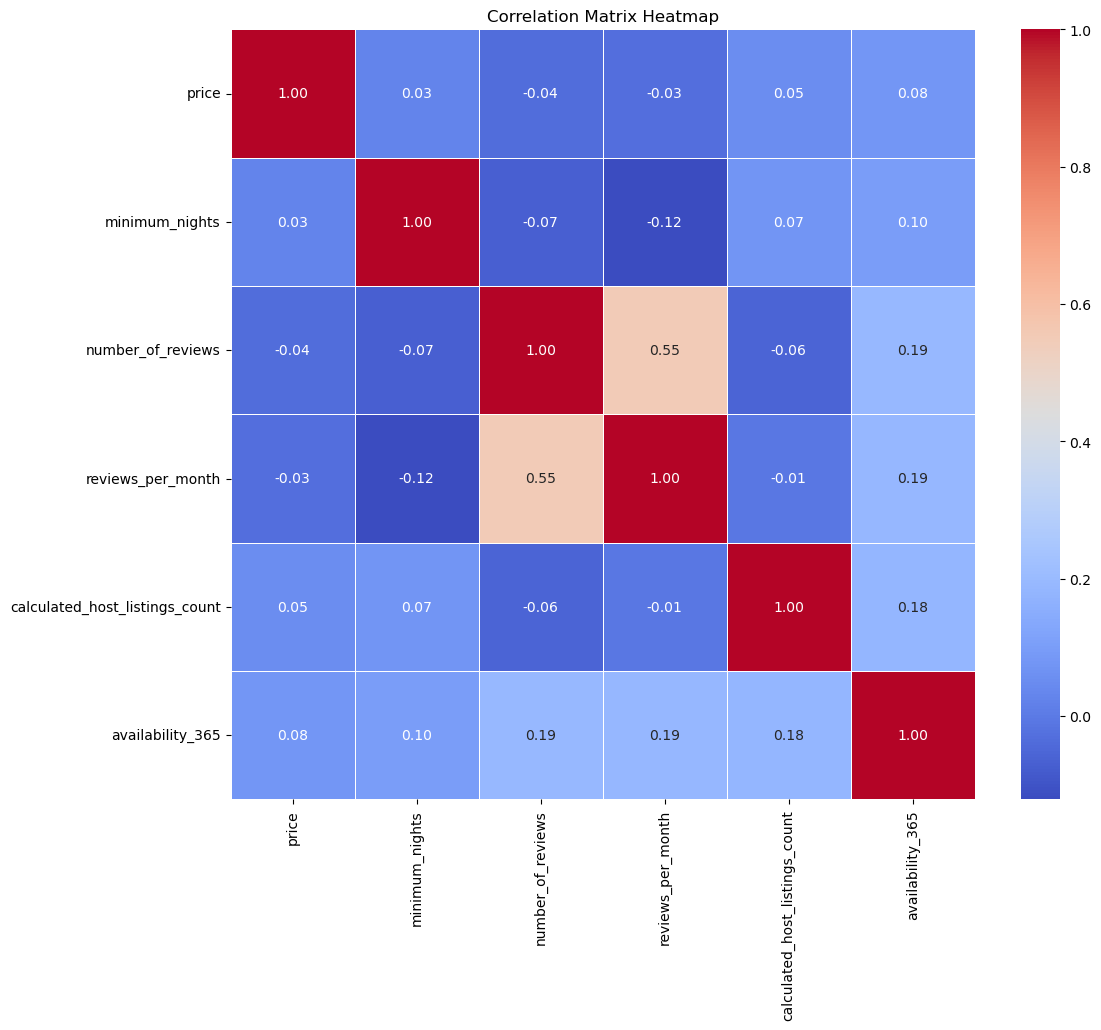

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
# Finding correlation 
# Including only numeric column
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [39]:
correlation_matrix # Correlation lies btw -1 to 1 Close to -1 -vely skewed close to 0 not correlated close to 1 +vely skewed

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


## Univariate Visualizations (Graphical)
In univariate analysis we study a particular column/field/variable.

### Categorical 

### Bar Graph

<Axes: xlabel='neighbourhood_group', ylabel='count'>

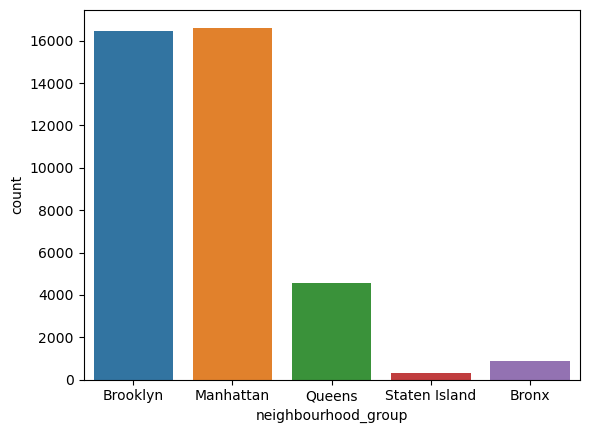

In [40]:
# Shows no. of hotels in various cities
sns.countplot(data=df,x="neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

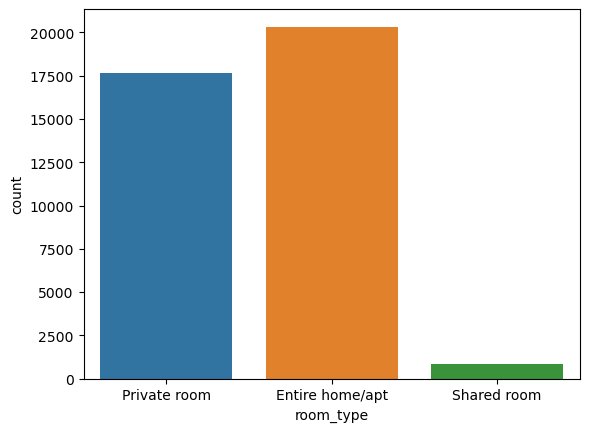

In [41]:
sns.countplot(data=df,x='room_type')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

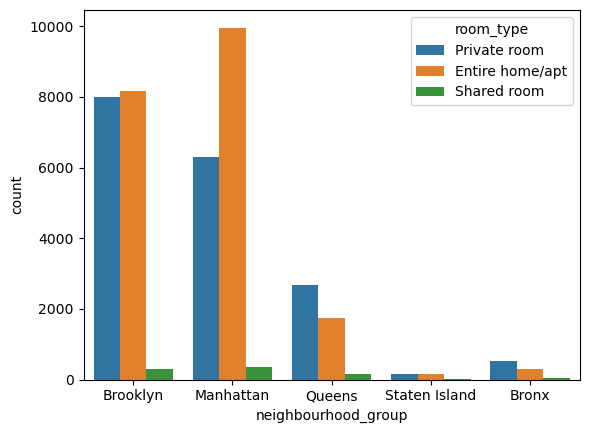

In [42]:
# Distribution of type of rooms in each city
sns.countplot(data=df,x="neighbourhood_group",hue="room_type")

### Pie Chart

<Axes: ylabel='count'>

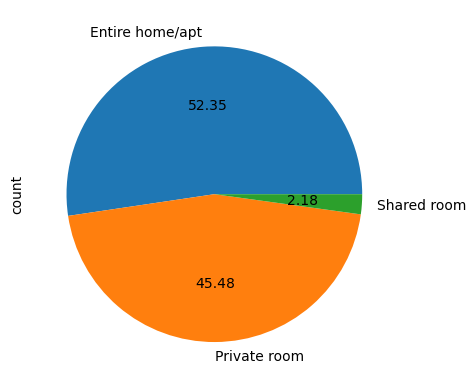

In [45]:
df["room_type"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='count'>

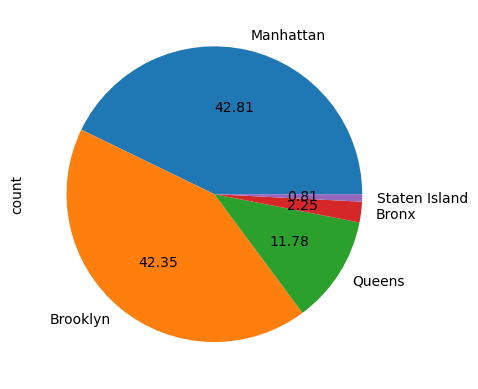

In [46]:
df["neighbourhood_group"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='room_type'>

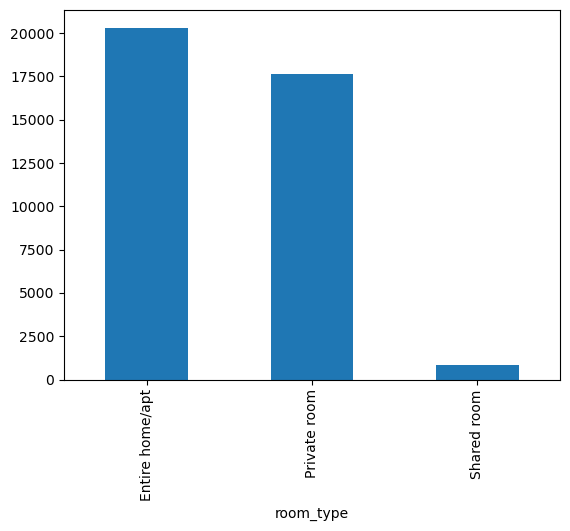

In [48]:
# Bar Graph use value_count
df["room_type"].value_counts().plot(kind="bar")

In [49]:
df2 = sns.load_dataset("titanic")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

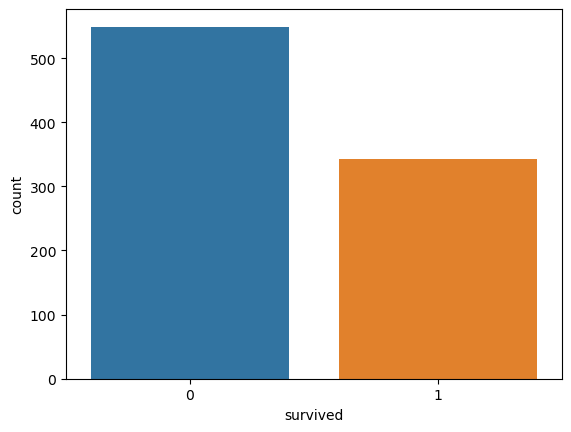

In [50]:
# Graph for no. of people who survived'0' abd who did not'1'
sns.countplot(data=df2,x="survived")

<Axes: xlabel='survived', ylabel='count'>

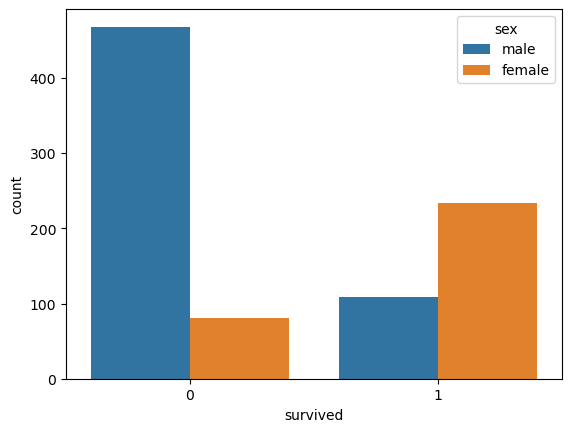

In [51]:
sns.countplot(data=df2,x="survived",hue='sex')

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='count'>

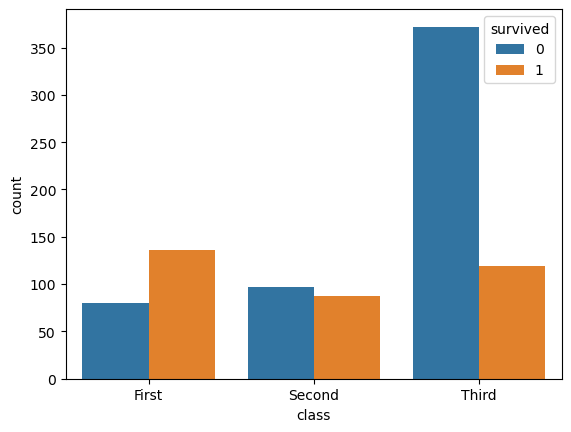

In [53]:
sns.countplot(data=df2,x="class",hue="survived")

<Axes: ylabel='count'>

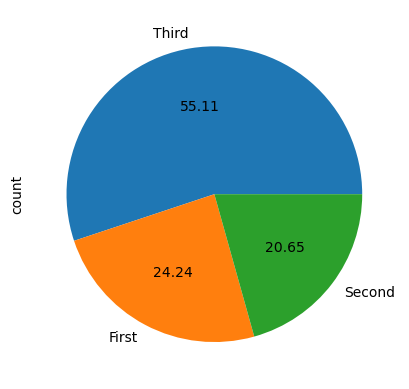

In [54]:
df2["class"].value_counts().plot(kind="pie",autopct="%.2f")

### Univariate Visualization in Numerical Data

### Histogram

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

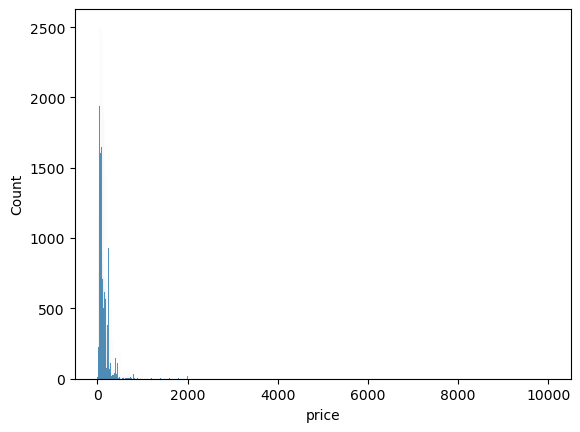

In [55]:
sns.histplot(data=df,x='price')

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

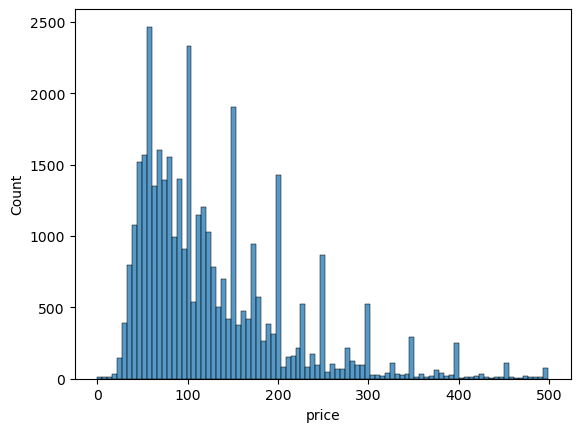

In [57]:
# How does price varies
sns.histplot(data=df[df["price"]<500],x='price')

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

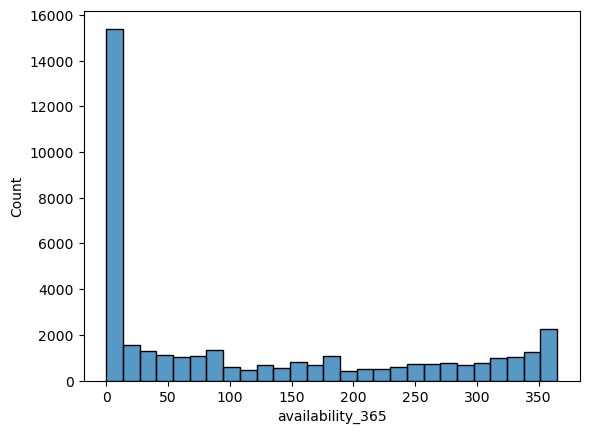

In [58]:
# Hotels which are available for 0 to 10 days..
sns.histplot(data=df,x='availability_365')

### Distribution
     Probability Distribution of price column in new York hotels dataset

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_56497/50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])
/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

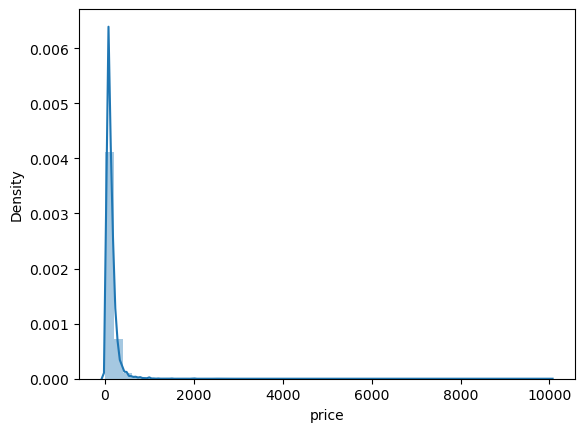

In [60]:
sns.distplot(df["price"]) # Left Skewed

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_56497/1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])
/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Density'>

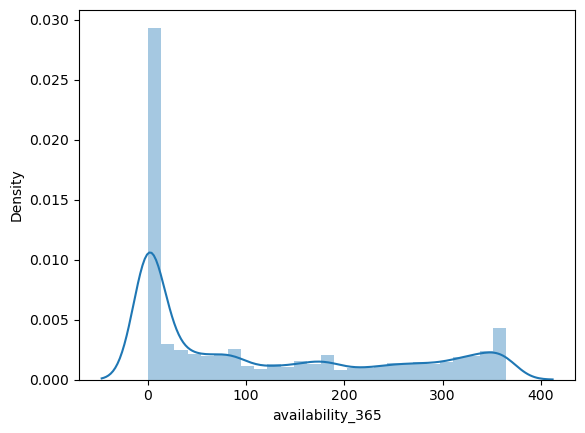

In [61]:
sns.distplot(df["availability_365"])

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_56497/2427716112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["reviews_per_month"])
/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reviews_per_month', ylabel='Density'>

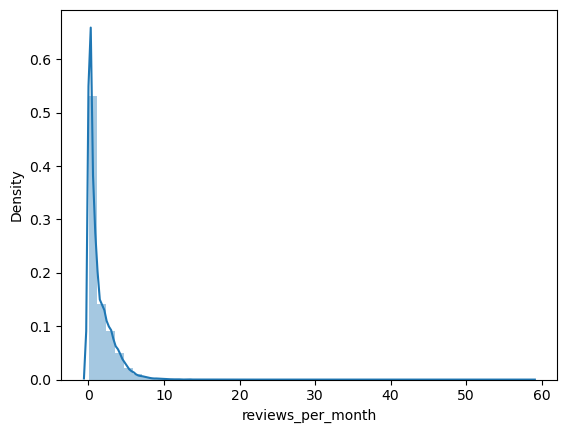

In [62]:
   sns.distplot(df["reviews_per_month"])

### Boxplot

<Axes: >

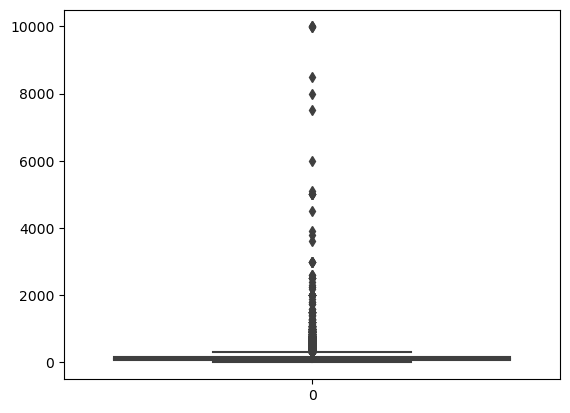

In [63]:
sns.boxplot(df["price"]) # Big Dataset

<Axes: >

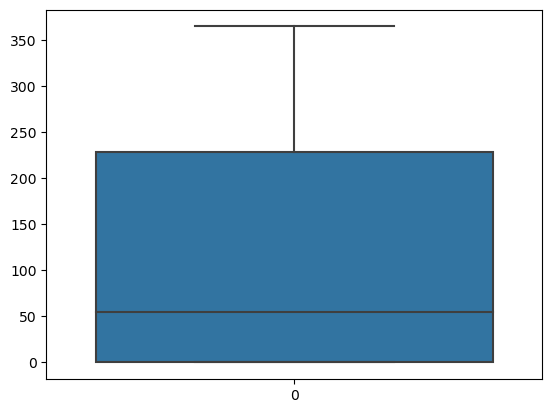

In [64]:
sns.boxplot(df["availability_365"])

<Axes: >

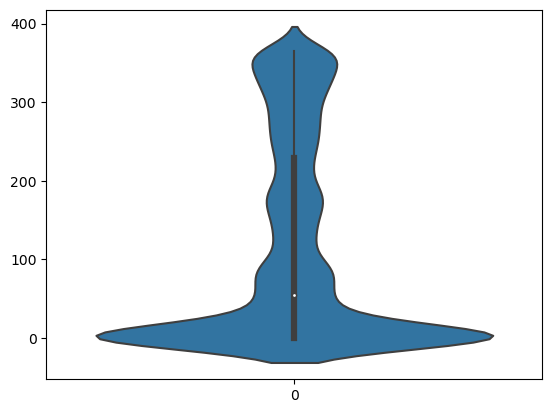

In [80]:
sns.violinplot(df["availability_365"])

In [65]:
df2 = sns.load_dataset("titanic")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

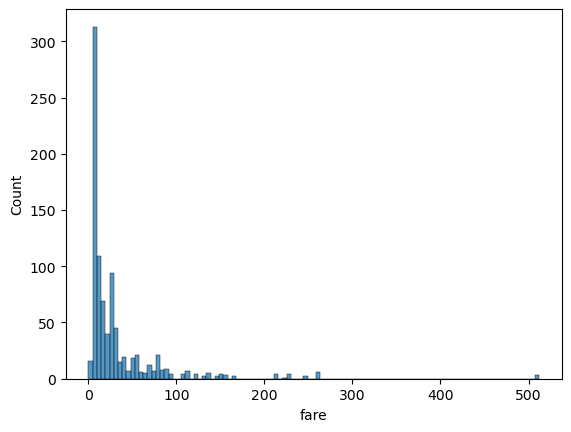

In [68]:
sns.histplot(data=df2,x='fare')

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_56497/3524834500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["fare"])
/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Density'>

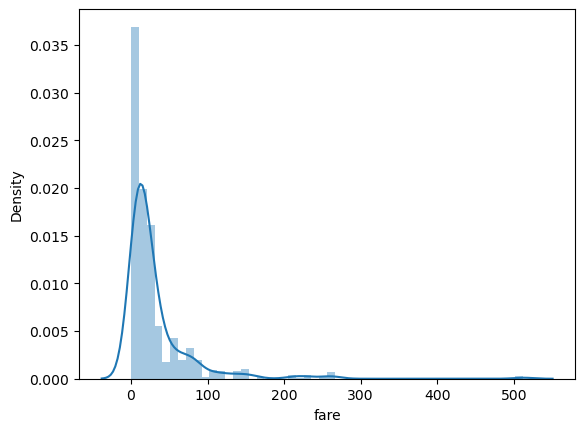

In [72]:
sns.distplot(df2["fare"])

<Axes: >

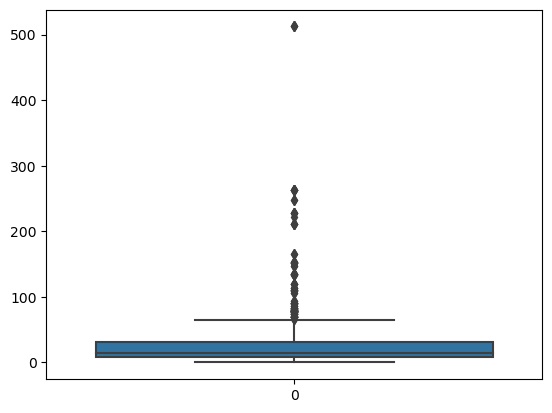

In [73]:
sns.boxplot(df2["fare"]) 

<Axes: >

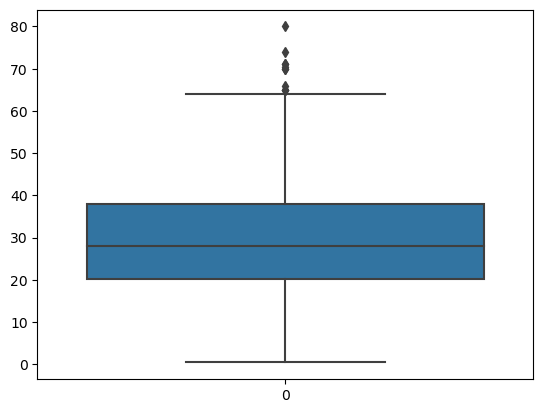

In [74]:
sns.boxplot(df2["age"])

<Axes: >

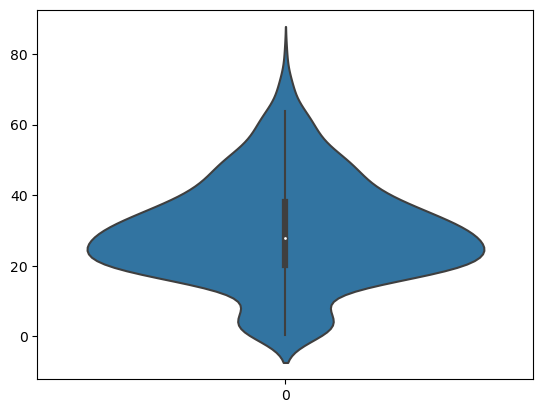

In [78]:
# Violen Plot gives all the boxplot values and also the distribution
sns.violinplot(df2["age"]) # LHS and RHS gives the probability distribution